# Neural Network Model

## Importing libraries

In [1]:
import csv
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import mediapipe as mp

2024-11-13 12:43:45.508529: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mp_pose = mp.solutions.pose

## Loading Data

In [4]:
train = pd.read_csv('../data/train.csv')

In [5]:
classes = train.loc[:, 'class'].unique()
classes

array(['HastaUttanasana', 'Uttanasana', 'Parvatasana',
       'AshwaSanchalanasana', 'Bhujangasana', 'AshtangaNamaskara',
       'Pranamasana'], dtype=object)

In [6]:
X = train.drop(columns=['class'])
X

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_z,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis
0,0.496112,0.074267,-0.250955,0.999003,0.528190,0.059394,-0.146007,0.997941,0.550696,0.060177,...,0.583128,0.326710,0.678813,0.983212,0.119562,0.632338,0.294864,0.968790,-0.093413,0.614772
1,0.562682,0.276660,-0.198480,0.993795,0.536773,0.270362,-0.174587,0.988927,0.534374,0.271651,...,0.035673,0.428453,0.604428,0.948188,0.341276,0.117294,0.603007,0.955990,-0.174406,0.335239
2,0.574148,0.487764,-0.557857,0.990614,0.583043,0.462585,-0.491770,0.984532,0.593059,0.461599,...,-0.663413,0.020145,0.539870,0.980021,-0.074462,0.011276,0.542893,0.920744,-0.875640,0.009579
3,0.529831,0.302906,-0.203826,0.982334,0.516948,0.311757,-0.229820,0.984826,0.515518,0.311879,...,0.286762,0.101021,0.705342,0.155320,0.327046,0.111655,0.634855,0.151662,0.270079,0.085881
4,0.527149,0.262190,0.007185,0.997610,0.514947,0.269760,0.031363,0.996554,0.515483,0.271882,...,-0.133639,0.631415,0.646852,0.836624,0.284874,0.074641,0.661294,0.846730,-0.304578,0.688178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.615359,0.286016,-0.523372,0.996935,0.618082,0.264836,-0.465179,0.995749,0.623508,0.263578,...,0.479627,0.076410,0.625430,1.019641,0.489708,0.113991,0.509327,1.002092,0.214984,0.080464
2556,0.580398,0.087267,-0.551150,0.999854,0.592130,0.071070,-0.496824,0.999768,0.601941,0.071943,...,0.184908,0.974320,0.615270,0.647368,0.460427,0.893272,0.619079,0.948757,-0.106826,0.994693
2557,0.396434,0.236478,-0.455173,0.999565,0.382668,0.221605,-0.403320,0.999406,0.380231,0.221041,...,-0.293523,0.843554,0.443175,0.947789,0.827978,0.685590,0.417621,0.960251,-0.604005,0.936873
2558,0.423315,0.539645,-0.223277,0.992970,0.429766,0.531515,-0.202113,0.992343,0.430334,0.526262,...,-0.430929,0.742113,0.435206,0.806576,-0.472791,0.907553,0.391049,0.745000,-0.569488,0.904462


In [7]:
print(X.shape)
33*4

(2560, 132)


132

In [8]:
y = train.loc[:, 'class']
y

0       HastaUttanasana
1       HastaUttanasana
2       HastaUttanasana
3       HastaUttanasana
4       HastaUttanasana
             ...       
2555        Pranamasana
2556        Pranamasana
2557        Pranamasana
2558        Pranamasana
2559        Pranamasana
Name: class, Length: 2560, dtype: object

In [9]:
class_mapping = {label: index for index, label in enumerate(y.unique())}

y = y.map(class_mapping)

In [10]:
print(len(class_mapping))
class_mapping

7


{'HastaUttanasana': 0,
 'Uttanasana': 1,
 'Parvatasana': 2,
 'AshwaSanchalanasana': 3,
 'Bhujangasana': 4,
 'AshtangaNamaskara': 5,
 'Pranamasana': 6}

In [11]:
y = keras.utils.to_categorical(y, num_classes=len(classes))

In [12]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
def load_csv(csv_path):
    df = pd.read_csv(csv_path)
    X = df.drop(columns=['class'])
    y = df.loc[:, 'class']
    class_mapping = {label: index for index, label in enumerate(y.unique())}
    y = y.map(class_mapping)
    y = keras.utils.to_categorical(y, num_classes=len(class_mapping))
    return X, y, classes

In [15]:
X, y, class_names = load_csv('../data/train.csv')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)
X_test, y_test, _ = load_csv('../data/test.csv')

## Preprocessing Data

In [18]:
def get_center_point(landmarks, left_bodypart, right_bodypart):
    """Calculates the center point of the two given landmarks."""
    left = tf.gather(landmarks, left_bodypart, axis=1)
    right = tf.gather(landmarks, right_bodypart, axis=1)
    center = (left + right) / 2.0
    return center

def get_pose_size(landmarks, torso_size_multiplier=2.5):
    """Calculates pose size based on torso size or maximum landmark distance."""
    hips_center = get_center_point(landmarks, mp_pose.PoseLandmark.LEFT_HIP.value, mp_pose.PoseLandmark.RIGHT_HIP.value)
    shoulders_center = get_center_point(landmarks, mp_pose.PoseLandmark.LEFT_SHOULDER.value, mp_pose.PoseLandmark.RIGHT_SHOULDER.value)
    torso_size = tf.norm(shoulders_center - hips_center)

    pose_center = hips_center 
    pose_center = tf.expand_dims(pose_center, axis=1)
    pose_center = tf.broadcast_to(pose_center, [tf.shape(landmarks)[0], 33, 2])

    max_dist = tf.reduce_max(tf.norm(landmarks[:, :, :2] - pose_center, axis=2))
    pose_size = tf.maximum(torso_size * torso_size_multiplier, max_dist)
    return pose_size

def normalize_pose_landmarks(landmarks):
    """Normalizes the pose landmarks to have a consistent scale and center based on the x, y coordinates."""
    pose_center = get_center_point(landmarks, mp_pose.PoseLandmark.LEFT_HIP.value, mp_pose.PoseLandmark.RIGHT_HIP.value)
    
    pose_center = tf.expand_dims(pose_center[:, :2], axis=1)  
    pose_center = tf.broadcast_to(pose_center, [tf.shape(landmarks)[0], 33, 2])

    landmarks = landmarks[:, :, :2] - pose_center 
    landmarks /= get_pose_size(landmarks)
    
    return landmarks


def landmarks_to_embedding(landmarks):
    """Converts landmarks into a pose embedding with consistent scale and center, focusing on x and y coordinates."""
    reshaped_inputs = tf.reshape(landmarks, (-1, 33, 4))
    
    xy_landmarks = reshaped_inputs[:, :, :2]
    
    normalized_landmarks = normalize_pose_landmarks(xy_landmarks)
    embedding = tf.keras.layers.Flatten()(normalized_landmarks)
    return embedding


def preprocess_data(X):
    processed_X = []
    for i in range(X.shape[0]):
        data_row = X.iloc[i].values
        
        reshaped_data = tf.reshape(tf.convert_to_tensor(data_row, dtype=tf.float32), (33, 4))
        
        embedding = landmarks_to_embedding(tf.expand_dims(reshaped_data, axis=0))
        processed_X.append(tf.reshape(embedding, (66,)))
    
    return tf.convert_to_tensor(processed_X, dtype=tf.float32)


In [19]:
processed_X_train = preprocess_data(X_train)
processed_X_val = preprocess_data(X_val)
processed_X_test = preprocess_data(X_test)

## Model Defining

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [21]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(66,)),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    
    Dense(len(class_names), activation='softmax')
])

/Users/apple/Desktop/Internship/Week_5_6/Final_Project/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,287 (67.53 KB)

 Trainable params: 17,287 (67.53 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
checkpoint_path = '../models/keypointClassifierModel.keras'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    restore_best_weights=True
)

csv_logger = CSVLogger('../logs/keypointClassifierModel.log')

callbacks = [checkpoint, earlystop, csv_logger]

## Model Training

In [84]:
history = model.fit(
    processed_X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(processed_X_val, y_val),
    callbacks=callbacks
)

Epoch 1/100
121/136 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.3582 - loss: 1.6255
Epoch 1: val_loss improved from inf to 0.63313, saving model to keypointModel.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3728 - loss: 1.5913 - val_accuracy: 0.9010 - val_loss: 0.6331
Epoch 2/100
 64/136 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.6765 - loss: 0.8530
Epoch 2: val_loss improved from 0.63313 to 0.40599, saving model to keypointModel.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7004 - loss: 0.7960 - val_accuracy: 0.9219 - val_loss: 0.4060
Epoch 3/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8245 - loss: 0.5629
Epoch 3: val_loss improved from 0.40599 to 0.31266, saving model to keypointModel.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8246 - loss: 0.5626 - val_accuracy: 0.9323 - val_loss: 0.3127
Epoch 4/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.8734 - loss: 0.4544
Epoch 4: val_loss improved from 0

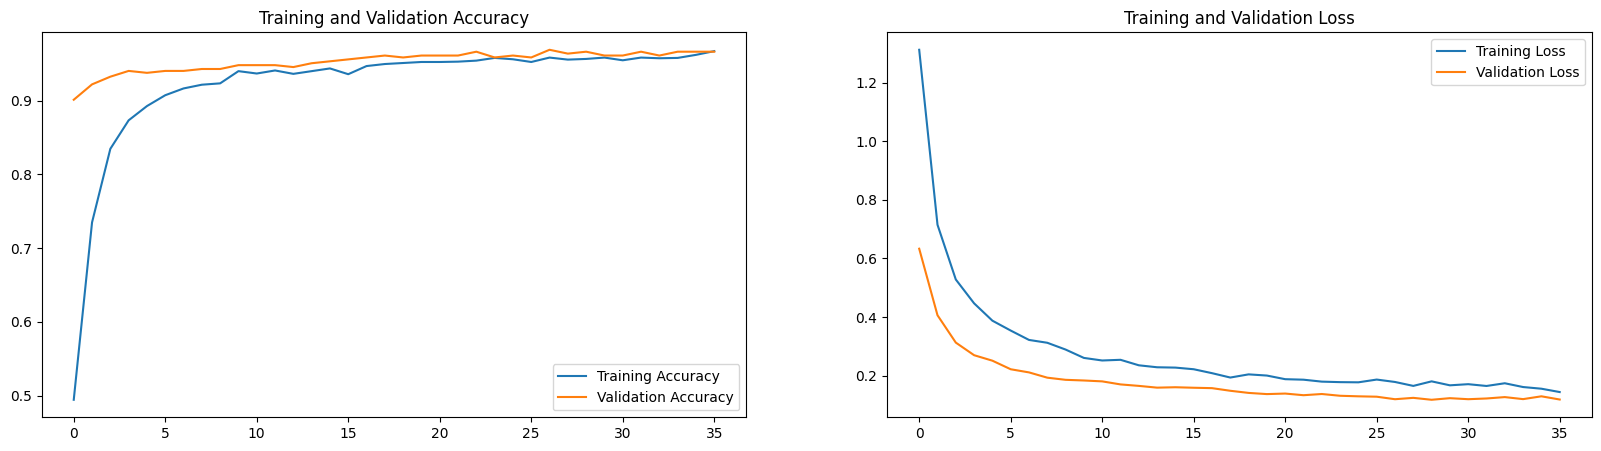

In [91]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(train_acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)

## Model Evaluation

In [86]:
loss, accuracy = model.evaluate(processed_X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9355 - loss: 0.2651


In [87]:
loss, accuracy

(0.26156488060951233, 0.9413629174232483)

In [99]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


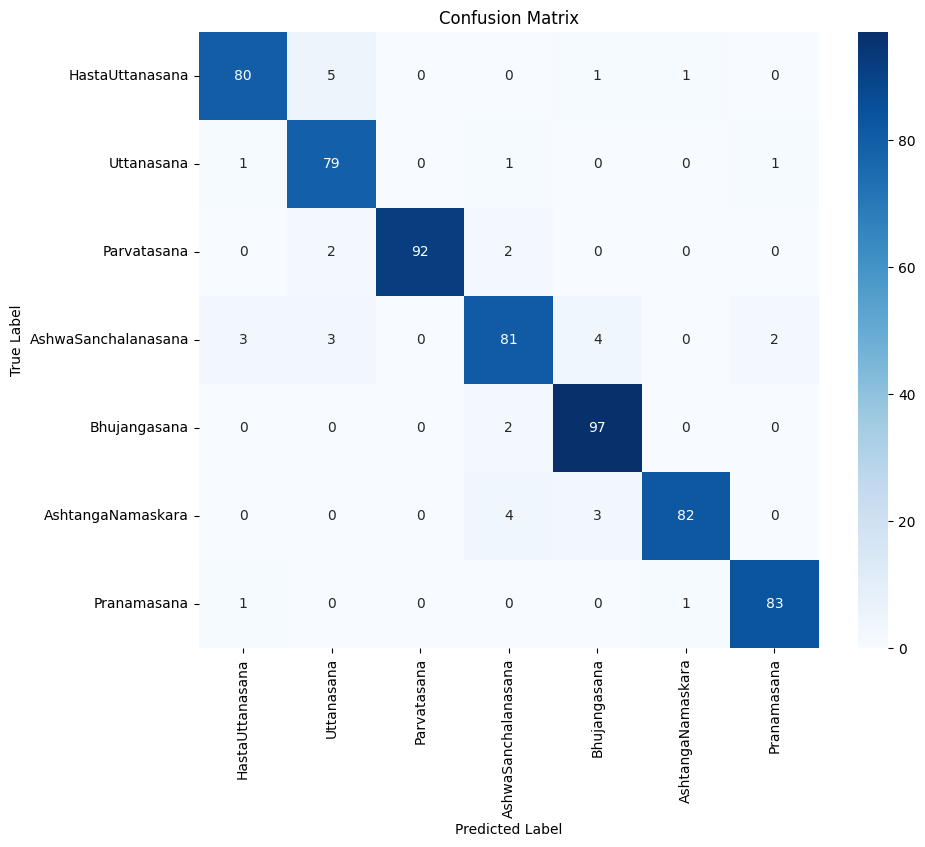

In [101]:
y_pred_probs = model.predict(processed_X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [96]:
y_pred[0]

array([9.9997741e-01, 2.0622015e-06, 2.1350848e-09, 6.8303011e-06,
       1.2901038e-08, 2.2661234e-06, 1.1461489e-05], dtype=float32)

# KNN Model

## Importing required libraries

In [46]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [32]:
train.iloc[:, :-1]

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_z,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis
0,0.496112,0.074267,-0.250955,0.999003,0.528190,0.059394,-0.146007,0.997941,0.550696,0.060177,...,0.583128,0.326710,0.678813,0.983212,0.119562,0.632338,0.294864,0.968790,-0.093413,0.614772
1,0.562682,0.276660,-0.198480,0.993795,0.536773,0.270362,-0.174587,0.988927,0.534374,0.271651,...,0.035673,0.428453,0.604428,0.948188,0.341276,0.117294,0.603007,0.955990,-0.174406,0.335239
2,0.574148,0.487764,-0.557857,0.990614,0.583043,0.462585,-0.491770,0.984532,0.593059,0.461599,...,-0.663413,0.020145,0.539870,0.980021,-0.074462,0.011276,0.542893,0.920744,-0.875640,0.009579
3,0.529831,0.302906,-0.203826,0.982334,0.516948,0.311757,-0.229820,0.984826,0.515518,0.311879,...,0.286762,0.101021,0.705342,0.155320,0.327046,0.111655,0.634855,0.151662,0.270079,0.085881
4,0.527149,0.262190,0.007185,0.997610,0.514947,0.269760,0.031363,0.996554,0.515483,0.271882,...,-0.133639,0.631415,0.646852,0.836624,0.284874,0.074641,0.661294,0.846730,-0.304578,0.688178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.615359,0.286016,-0.523372,0.996935,0.618082,0.264836,-0.465179,0.995749,0.623508,0.263578,...,0.479627,0.076410,0.625430,1.019641,0.489708,0.113991,0.509327,1.002092,0.214984,0.080464
2556,0.580398,0.087267,-0.551150,0.999854,0.592130,0.071070,-0.496824,0.999768,0.601941,0.071943,...,0.184908,0.974320,0.615270,0.647368,0.460427,0.893272,0.619079,0.948757,-0.106826,0.994693
2557,0.396434,0.236478,-0.455173,0.999565,0.382668,0.221605,-0.403320,0.999406,0.380231,0.221041,...,-0.293523,0.843554,0.443175,0.947789,0.827978,0.685590,0.417621,0.960251,-0.604005,0.936873
2558,0.423315,0.539645,-0.223277,0.992970,0.429766,0.531515,-0.202113,0.992343,0.430334,0.526262,...,-0.430929,0.742113,0.435206,0.806576,-0.472791,0.907553,0.391049,0.745000,-0.569488,0.904462


In [33]:
X_train, X_test, y_train, y_test = train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]

In [28]:
knnc = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [38]:
knnc.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [105]:
knnc.classes_

array(['AshtangaNamaskara', 'AshwaSanchalanasana', 'Bhujangasana',
       'HastaUttanasana', 'Parvatasana', 'Pranamasana', 'Uttanasana'],
      dtype=object)

In [39]:
y_pred = knnc.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[81  1  1  0  3  0  3]
 [ 0 83  6  1  0  1  2]
 [ 0  0 98  0  0  0  1]
 [ 0  1  0 80  0  3  3]
 [ 3  1  0  0 87  1  4]
 [ 0  0  0  7  0 78  0]
 [ 0  0  1  2  4  0 75]]


In [50]:
cr = classification_report(y_test, y_pred)
print('Classification report:\n', cr)

Classification report:
                      precision    recall  f1-score   support

  AshtangaNamaskara       0.96      0.91      0.94        89
AshwaSanchalanasana       0.97      0.89      0.93        93
       Bhujangasana       0.92      0.99      0.96        99
    HastaUttanasana       0.89      0.92      0.90        87
        Parvatasana       0.93      0.91      0.92        96
        Pranamasana       0.94      0.92      0.93        85
         Uttanasana       0.85      0.91      0.88        82

           accuracy                           0.92       631
          macro avg       0.92      0.92      0.92       631
       weighted avg       0.92      0.92      0.92       631



In [51]:
import cv2
import mediapipe as mp

In [53]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

I0000 00:00:1731485836.567518 1156941 gl_context.cc:357] GL version: 2.1 (2.1 ATI-6.1.13), renderer: AMD Radeon Pro 5300M OpenGL Engine


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1731485836.737476 1182652 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731485836.774036 1182664 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [54]:
test_img = cv2.imread('../data/sun_salutation_poses/test/Bhujangasana/16102003_2564.jpg', cv2.COLOR_BGR2RGB)

In [56]:
results = pose.process(test_img)

In [94]:
row = []
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    for landmark in landmarks:
        row.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])

In [ ]:
temp = np.expand_dims(row)

In [104]:
knnc.predict(temp)[0]

/Users/apple/Desktop/Internship/Week_5_6/Final_Project/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Bhujangasana'

# Xgboost Classifier

In [1]:
import xgboost as xgb

In [108]:
classifier = xgb.XGBClassifier(max_depth=3, objective='multi:softprob')

In [110]:
y_train

0       HastaUttanasana
1       HastaUttanasana
2       HastaUttanasana
3       HastaUttanasana
4       HastaUttanasana
             ...       
2555        Pranamasana
2556        Pranamasana
2557        Pranamasana
2558        Pranamasana
2559        Pranamasana
Name: class, Length: 2560, dtype: object

In [111]:
from sklearn.preprocessing import LabelEncoder

In [112]:
lab_enc = LabelEncoder()

In [117]:
y_train_enc = lab_enc.fit_transform(y_train)
y_train_enc

array([3, 3, 3, ..., 5, 5, 5])

In [119]:
classifier.fit(X_train, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [121]:
y_pred_enc = classifier.predict(X_test)

In [122]:
y_pred = lab_enc.inverse_transform(y_pred_enc)

In [124]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[88  0  0  0  1  0  0]
 [ 0 81  5  3  0  2  2]
 [ 0  1 98  0  0  0  0]
 [ 0  1  0 82  0  0  4]
 [ 1  1  0  0 90  1  3]
 [ 0  0  0  3  0 82  0]
 [ 0  2  0  0  1  1 78]]


In [125]:
classifier.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [126]:
lab_enc.classes_

array(['AshtangaNamaskara', 'AshwaSanchalanasana', 'Bhujangasana',
       'HastaUttanasana', 'Parvatasana', 'Pranamasana', 'Uttanasana'],
      dtype=object)